In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [146]:
data_train = pd.read_csv("./Data/train.csv")
data_test = pd.read_csv("./Data/test.csv")
m_train, n_train = data_test.shape
m_test, n_test = data_test.shape
print(f"Shape test data: {m_test, n_test}")

Shape test data: (1459, 80)


# DATA CLEANING

In [108]:
data_train = data_train.apply(pd.to_numeric, errors='coerce') # Tranform no numeric value to NaN
data_train.dropna(axis=1, inplace=True) # Drop Nan

In [110]:
y = data_train['SalePrice']
X = data_train.drop(labels='SalePrice', axis=1)

In [112]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

# DATA OBSERVATION

In [149]:
data_train.describe() # Same for test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [116]:
num_features = data_train.select_dtypes(exclude='object')
num_corr = num_features.corr()

<AxesSubplot:>

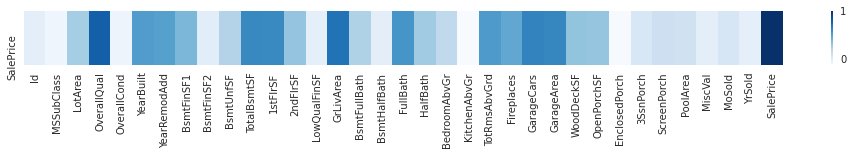

In [118]:
plt.subplots(figsize=(17,1))
sns.heatmap(num_corr.sort_values(by="SalePrice", ascending=False).head(1), cmap='Blues')

In [120]:
cat_features = data_train.select_dtypes(include='object') 

In [122]:
data_train.isna().sum().sort_values(ascending=False).head(20) # See NaN value in Col

SalePrice       0
BsmtFinSF2      0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF1      0
BsmtHalfBath    0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
OverallQual     0
LotArea         0
MSSubClass      0
BsmtFullBath    0
FullBath        0
YrSold          0
OpenPorchSF     0
dtype: int64

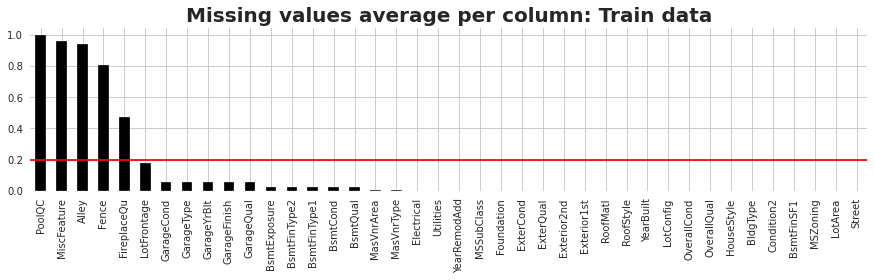

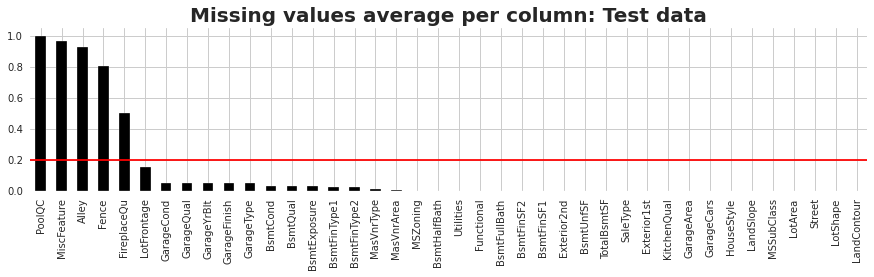

In [150]:
def plotbar_missing_values_average(dataset, dataset_name):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')

    plt.subplots(figsize=(15,3))
    dataset.isnull().mean().sort_values(ascending=False).head(40).plot.bar(color='black')
    plt.axhline(y=0.2, color='r', linestyle='-')
    plt.title(f'Missing values average per column: {dataset_name}', fontsize=20, weight='bold' )
    plt.show()
    
plotbar_missing_values_average(data_train, 'Train data')
plotbar_missing_values_average(data_test, 'Test data')

# DATA PREPROCESING

In [125]:
from sklearn.linear_model import Perceptron

In [136]:
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False)

In [137]:
clf.fit(X_train, y_train)

Perceptron(fit_intercept=False, max_iter=10, shuffle=False, tol=None)

# MODEL EVALUATION

In [128]:
y_pred_train = clf.predict(X_train)

In [132]:
from sklearn.metrics import mean_squared_log_error

In [134]:
np.sqrt(mean_squared_log_error(y_train, y_pred_train))

0.3957809333074612

In [138]:
y_pred_valid= clf.predict(X_valid)

In [139]:
np.sqrt(mean_squared_log_error(y_valid, y_pred_valid))

0.4059127896392397